# Mendefinisikan Training set and Validation set

In [ ]:
# Mount Google Drive ==> tujuannya untuk menyimpan hasil, maupun mengambil file dari google drive untuk diolah
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

train_dir = "/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/Dataset/cats_and_dogs_filtered/train"
val_dir = "/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/Dataset/cats_and_dogs_filtered/validation"


In [ ]:
cat_train_path = train_dir + '/cats'
dog_train_path = train_dir + '/dogs'
cat_val_path = val_dir + '/cats'
dog_val_path = val_dir + '/dogs'

cat_len_train = len(os.listdir(cat_train_path))
dog_len_train = len(os.listdir(dog_train_path))
cat_len_val = len(os.listdir(cat_val_path))
dog_len_val = len(os.listdir(dog_val_path))

print("jumlah dataset Training : ", cat_len_train + dog_len_train)
print("jumlah dataset validasi : ", cat_len_val + dog_len_val)
print("\n\n")
print("jumlah train kelas Cat : ", cat_len_train)
print("jumlah train kelas Dog : ", dog_len_train)
print("jumlah validasi kelas Cat : ", cat_len_val)
print("jumlah validasi kelas Dog : ", dog_len_val)

jumlah dataset Training :  2000
jumlah dataset validasi :  1000



jumlah train kelas Cat :  1000
jumlah train kelas Dog :  1000
jumlah validasi kelas Cat :  500
jumlah validasi kelas Dog :  500


In [ ]:
# lakukan pengecekan terhadap format nama dan ekstensi dari gambar
train_cat_fnames = os.listdir( cat_train_path )
train_dog_fnames = os.listdir( dog_train_path )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.100.jpg', 'dog.10.jpg', 'dog.1.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# parameter dari visualisasi dimana terdiri atas 4 baris dan 4 kolom
nrows = 4
ncols = 4

pic_index = 0 # inisialisasi nilai awal untuk melakukan iterasi

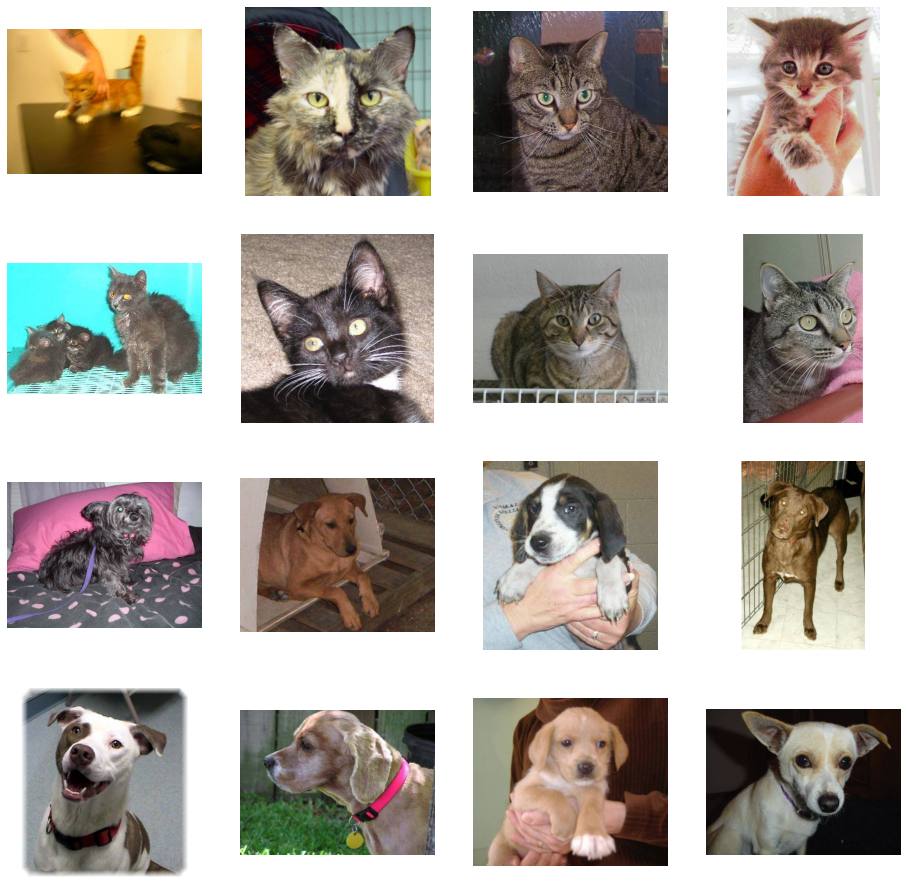

In [ ]:
# mengatur matplotlib fig, dan ukuran visualisasi ke 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(cat_train_path, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(dog_train_path, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # menyeting subplot
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # tidak menampilkan axes (atau gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Dataset Preprocessing



---
**AUGMENTATION**

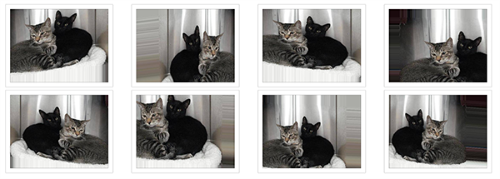



---

**Kenapa Harus Menggunakan Metode Augmentasi ?** 


 

*   Performa Deep Learning salah satunya tergantung dengan jumlah dataset yang dilatih. semakin banyak variasi dan jumlah dataset maka performanya juga akan semakin baik. salah satu cara memperkaya dataset yaitu dengan menggunakan metode "Augmentasi". metode Augmentasi merupakan teknik meningkatkan atau memanipulasi sebuah data tanpa kehilangan inti atau esensi dari data tersebut. atau secara artificial dapat diartikan sebagai upaya meningkatkan training_set (dataset pelatihan) dengan mengubah gambar sedemikian rupa sehingga label tetap dipertahankan.  

*   dalam pengenalan image terkadang juga terdapat beberapa tantangan dan permasalahan seperti melakukan klasifikasi gambar yang memiliki sudut pandang, pencahayaan, latar belakang, skala, dan lainnya. agar kelak model dapat mengenali hal tersebut (unseen image). maka augmentasi juga berperan dalam mengatasinya. seleain beberapa manfaat augmentasi seperti yang telah disebutkan diatas. teknik ini juga mampu mengatasi terjadinya overfitting.







---
**Augmentasi Using Keras**

ada beberapa opsi yang tersedia di dalam library Keras untuk melakukan augmentasi dataset, diantaranya: 


1.   rotation_range : nilai dalam rentang derajat (0-180), untuk memutar gambar secara acak 
2.   width_shift dan height_shift : merupakan rentang nilai (total lebar atau tinggi) untuk menerjemahkan gambar secara vertikal dan horizintal. 
3.   shear_range : menerapkan transformasi geser secara acak
4.   zoom_range : untuk memperbesar gambar secara acak.
5.   horizontal_flip : untuk membalik setengah gambar secara acak dan horizontal.
6.   fill_mode : strategi yang digunakan untuk mengisi piksel yang baru dibuat. 


dokumentasi augmentasi menggunakan keras secara lengkap dapat diakses pada link berikut : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator








In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PROSES AUGMENTASI
# semua image akan di normalisasi dengan membagi 1./255.
# dan dilakukan augmentasi seperti merotasi gambar secara acak, memperbesar gambar secara acak, dan lainnya. 
train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images dalam 20 batches menggunakan train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images dalam 20 batches menggunakan test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# import library yang dibutuhkan untuk membangun arsitektur model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

Penambahan Dropout layer akan mengurangi terjadinya overfitting, meningkatkan akurasi, serta mempercepat proses pelatihan. pada kasus ini diberikan dropout sebesar 0.3 berarti neuron yang saling terhubung akan dibuang sebesar 30% untuk menghindari terjadinya overfitting. 

In [ ]:
img_input = layers.Input(shape=(150, 150, 3)) # Layer Input
x = layers.Flatten()(img_input) # Flatten Layer
x = layers.Dropout(0.01)(x) # Dropout Layer
x = layers.Dense(125, activation='relu')(x) # Hidden Layer 
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Print model summary
print(model.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_8 (Flatten)         (None, 67500)             0         
                                                                 
 dropout_9 (Dropout)         (None, 67500)             0         
                                                                 
 dense_22 (Dense)            (None, 125)               8437625   
                                                                 
 dense_23 (Dense)            (None, 1)                 126       
                                                                 
Total params: 8,437,751
Trainable params: 8,437,751
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.optimizers import RMSprop


In [ ]:
# Compile model

model.compile(optimizer=RMSprop(lr=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  #  images = batch_size * steps
)

Epoch 1/100
100/100 [==============================] - 25s 247ms/step - loss: 2.1500 - acc: 0.5060 - val_loss: 2.3320 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 24s 243ms/step - loss: 1.9279 - acc: 0.4915 - val_loss: 1.6752 - val_acc: 0.5020
Epoch 3/100
100/100 [==============================] - 25s 247ms/step - loss: 1.7654 - acc: 0.5165 - val_loss: 1.8478 - val_acc: 0.5010
Epoch 4/100
100/100 [==============================] - 24s 244ms/step - loss: 1.7279 - acc: 0.5215 - val_loss: 1.2668 - val_acc: 0.5080
Epoch 5/100
100/100 [==============================] - 25s 246ms/step - loss: 1.7324 - acc: 0.5025 - val_loss: 1.6557 - val_acc: 0.5030
Epoch 6/100
100/100 [==============================] - 24s 239ms/step - loss: 1.7403 - acc: 0.5120 - val_loss: 1.7060 - val_acc: 0.5030
Epoch 7/100
100/100 [==============================] - 24s 236ms/step - loss: 1.7031 - acc: 0.5140 - val_loss: 0.7717 - val_acc: 0.5680
Epoch 8/100
100/100 [===========================

# Model Evaluation

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

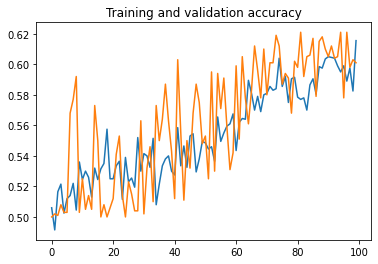

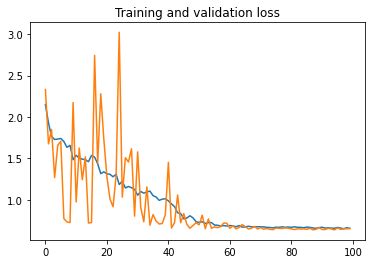

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Accuracy  : 0.527
Precision : 0.529123071944774
f1Score : 0.5182195513228591
[[331 169]
 [304 196]]


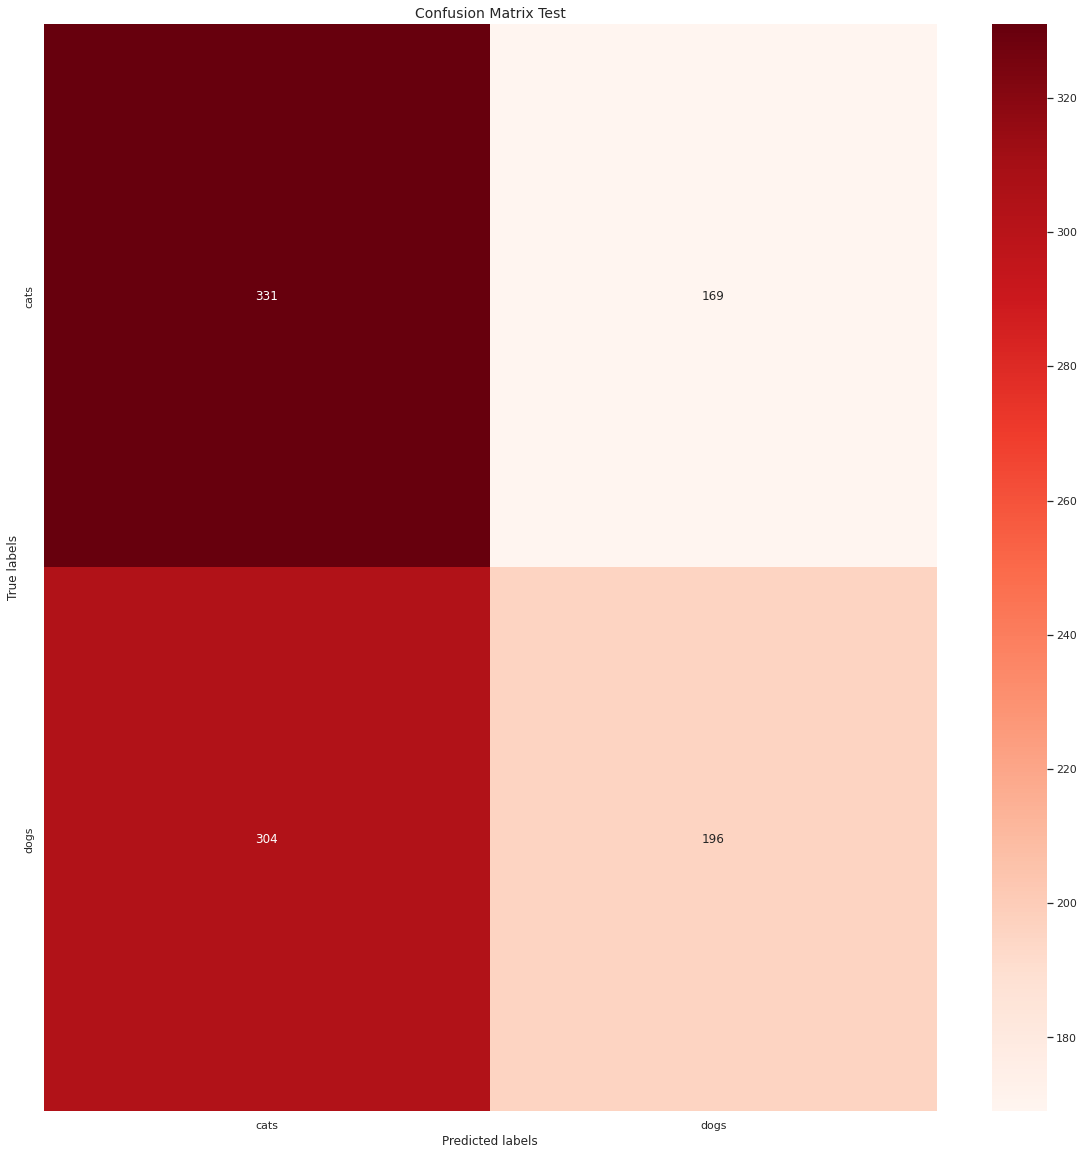

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score


predictions = model.predict_generator(generator=validation_generator)
yPredictions = predictions > 0.5
true_classes = validation_generator.classes
class_names = validation_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

        cats       0.52      0.66      0.58       500
        dogs       0.54      0.39      0.45       500

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.52      1000
weighted avg       0.53      0.53      0.52      1000



In [ ]:
model.save("/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/cats_and_dog_using_augmentation_dropout.h5")

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/cats_and_dog_using_augmentation_dropout.h5'

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 
model = load_model(model_path)

Saving cat 1.jpg to cat 1.jpg
Saving cat 2.jpg to cat 2.jpg
Saving cat 3.jpg to cat 3.jpg
Saving cat 4.jpg to cat 4.jpg
Saving cat 5.jpg to cat 5.jpg
Saving dog 1.jpg to dog 1.jpg
Saving dog 2.jpg to dog 2.jpg
Saving dog 3.jpg to dog 3.jpg
Saving dog 4.jpg to dog 4.jpg
Saving dog 5.jpg to dog 5.jpg
[1.]
cat 1.jpg is a dog
[0.]
cat 2.jpg is a cat
[0.]
cat 3.jpg is a cat
[1.]
cat 4.jpg is a dog
[1.]
cat 5.jpg is a dog
[1.]
dog 1.jpg is a dog
[1.]
dog 2.jpg is a dog
[0.]
dog 3.jpg is a cat
[1.]
dog 4.jpg is a dog
[0.98834074]
dog 5.jpg is a dog
